In [241]:
import pandas as pd
from sklearn.model_selection import train_test_split
import math as mt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import joblib

## Cargue de datos

In [186]:
from sklearn.inspection import permutation_importance

In [187]:
train = pd.read_csv("s3://claseelectiva2mao/datos/train", index_col=0)
test = pd.read_csv("s3://claseelectiva2mao/datos/test", index_col=0)

In [188]:
sub_train, val = train_test_split(train, test_size=0.3, random_state=42)

In [189]:
sub_train

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
Unnamed: 0,,,,,,,,,,
241,51,male,2,own,little,NaN,1595,6,radio/TV,good
411,35,male,3,own,little,NaN,7253,33,car,good
384,26,male,1,own,moderate,NaN,4272,30,business,good
671,31,male,2,own,moderate,NaN,5742,36,business,good
763,30,male,3,free,NaN,NaN,12680,21,car,bad
...,...,...,...,...,...,...,...,...,...,...
644,32,male,3,own,little,little,1880,18,radio/TV,good
880,38,male,3,own,little,NaN,7814,24,car,good
450,30,male,3,own,NaN,NaN,11054,36,car,good


In [190]:
X_train = sub_train.drop("Risk", axis=1)

In [191]:
y_train = sub_train["Risk"]

In [192]:
X_train = pd.get_dummies(X_train)

In [193]:
X_val = pd.get_dummies(val.drop("Risk", axis=1))
y_val = val["Risk"]

In [194]:
from sklearn.ensemble import ExtraTreesClassifier

In [195]:
#model = ExtraTreesClassifier(n_estimators=100, random_state=0)

In [196]:
model = DecisionTreeClassifier()

In [197]:
#model = RandomForestClassifier()

In [198]:
#model = LogisticRegression()

In [199]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [200]:
r = permutation_importance(model, X_val, y_val, n_repeats=10)

In [201]:
r

{'importances_mean': array([ 1.38095238e-02, -1.71428571e-02, -3.33333333e-03,  8.57142857e-03,
         5.71428571e-03,  0.00000000e+00,  2.38095238e-03, -4.28571429e-03,
         1.42857143e-03,  4.76190476e-03, -2.22044605e-17,  0.00000000e+00,
         4.76190476e-04,  2.38095238e-03,  2.00000000e-02, -8.57142857e-03,
         2.85714286e-03,  5.71428571e-03,  0.00000000e+00, -1.42857143e-03,
         2.76190476e-02, -2.85714286e-03,  0.00000000e+00,  0.00000000e+00]),
 'importances_std': array([0.01053016, 0.0113089 , 0.01580063, 0.01441214, 0.00285714,
        0.        , 0.00319438, 0.00619048, 0.00304911, 0.01043281,
        0.00301169, 0.        , 0.00142857, 0.00681801, 0.01562021,
        0.00466569, 0.00315869, 0.00555329, 0.        , 0.0052381 ,
        0.00791107, 0.00645936, 0.        , 0.        ]),
 'importances': array([[ 0.00952381,  0.02380952,  0.0047619 ,  0.03809524,  0.        ,
          0.00952381,  0.0047619 ,  0.01428571,  0.01428571,  0.01904762],
        [

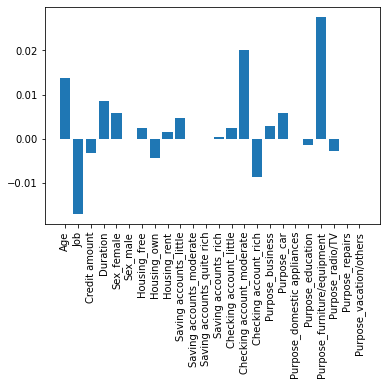

In [202]:
plt.bar(x=X_train.columns, height=r["importances_mean"])
plt.xticks(rotation = 90)
plt.show()

In [203]:
from sklearn.metrics import accuracy_score

In [204]:
accuracy_score(model.predict(X_val), y_val)

0.638095238095238

In [205]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_validate

In [206]:
train = pd.read_csv("s3://claseelectiva2mao/datos/train", index_col=0)
test = pd.read_csv("s3://claseelectiva2mao/datos/test", index_col=0)

In [207]:
X_train = sub_train.drop("Risk", axis=1)
X_train = pd.get_dummies(X_train)
y_train = sub_train["Risk"]

In [208]:
k_fold = KFold(n_splits = 3)

In [209]:
##for train_indices, val_indices in k_fold.split(X_train, y_train):    
  ##  print("train", train_indices)
    ##print("val", val_indices)

In [253]:
train_score = []
test_score = []
permutar = []
for train_indices, val_indices in k_fold.split(X_train, y_train):    
    X_sub_train = X_train.iloc[train_indices, :]
    y_sub_train = y_train.iloc[train_indices]
    X_val = X_train.iloc[val_indices, :]
    y_val = y_train.iloc[val_indices]
    model = DecisionTreeClassifier(max_depth=3)
    model.fit(X_sub_train, y_sub_train)
    train_score.append(model.score(X_sub_train, y_sub_train))
    test_score.append(model.score(X_val, y_val))
    r = permutation_importance(model, X_val, y_val, n_repeats=10)
    permutar.append(r.importances_mean)
print('train_score =',train_score,'\ntest_score =', test_score)

print(np.mean(permutar))
    

train_score = [0.7699386503067485, 0.7798165137614679, 0.7798165137614679] 
test_score = [0.7012195121951219, 0.6932515337423313, 0.6748466257668712]
0.002074085158029492


In [212]:
cross_validate(DecisionTreeClassifier(max_depth=3), X_train, y_train, cv= 3, scoring='accuracy', return_train_score =True)

{'fit_time': array([0.00352645, 0.0041101 , 0.00643301]),
 'score_time': array([0.00172234, 0.00169873, 0.00477695]),
 'test_score': array([0.65243902, 0.73006135, 0.68711656]),
 'train_score': array([0.78527607, 0.75840979, 0.76452599])}

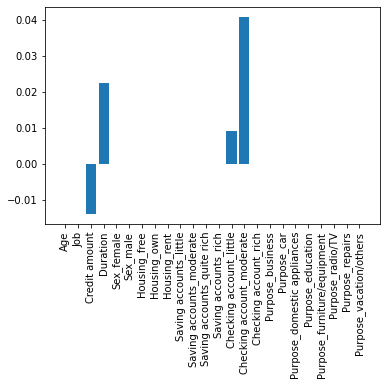

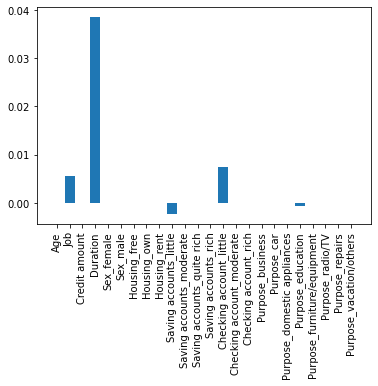

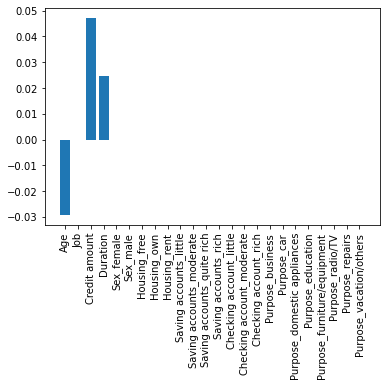

In [263]:
for i in range(3):
    plt.bar(x=X_train.columns, height=permutar[i])
    plt.xticks(rotation = 90)
    plt.show()

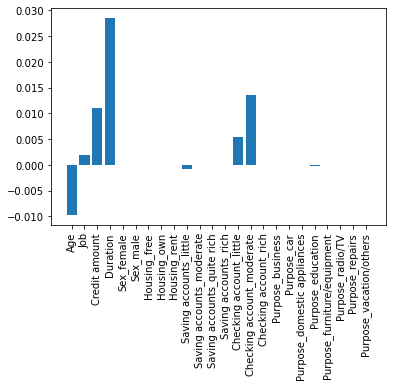

In [267]:
plt.bar(x=X_train.columns, height=((permutar[0]+permutar[1]+permutar[2])/3))
plt.xticks(rotation = 90)
plt.show()